In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Prices for last 3 years. 30% of 10 years.
df = pd.read_csv("Benchmark test 6years data.csv")

In [ ]:
df = df.iloc[:len(df)//2]

In [ ]:
df.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,06/24/2024,177.96,176.16,178.90,175.13,47.59M,-1.10%
1,06/21/2024,179.94,179.40,180.90,178.18,65.50M,-1.28%
2,06/20/2024,182.28,181.60,182.95,179.37,38.84M,1.26%
3,06/19/2024,180.02,182.45,182.49,179.31,27.48M,-0.61%
4,06/18/2024,181.12,183.80,184.60,180.60,35.03M,-1.11%
5,06/14/2024,183.15,182.95,183.50,181.40,28.51M,0.32%
6,06/13/2024,182.56,183.40,184.10,180.51,36.67M,0.18%
7,06/12/2024,182.23,182.25,183.87,181.50,33.31M,0.50%
8,06/11/2024,181.33,180.50,183.75,180.50,55.56M,0.58%
9,06/10/2024,180.29,180.21,182.10,177.36,74.29M,0.78%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      742 non-null    object 
 1   Price     742 non-null    float64
 2   Open      742 non-null    float64
 3   High      742 non-null    float64
 4   Low       742 non-null    float64
 5   Vol.      742 non-null    object 
 6   Change %  742 non-null    object 
dtypes: float64(4), object(3)
memory usage: 40.7+ KB


In [ ]:
x = df.iloc[::-1]
x = x.reset_index(drop=True)

In [ ]:
x['Date'] = pd.to_datetime(x['Date'])
x['Vol.'] = x['Vol.'].str.replace('M', '').astype(float) * 1_000_000

In [ ]:
x

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-06-28,118.40,117.40,118.90,116.30,116600000.0,1.61%
1,2021-06-29,117.25,118.45,119.20,116.56,78040000.0,-0.97%
2,2021-06-30,116.66,118.11,119.10,116.28,80430000.0,-0.51%
3,2021-07-01,116.36,117.19,117.68,115.64,56150000.0,-0.26%
4,2021-07-02,113.60,116.60,116.68,113.02,75730000.0,-2.37%
...,...,...,...,...,...,...,...
737,2024-06-18,181.12,183.80,184.60,180.60,35030000.0,-1.11%
738,2024-06-19,180.02,182.45,182.49,179.31,27480000.0,-0.61%
739,2024-06-20,182.28,181.60,182.95,179.37,38840000.0,1.26%
740,2024-06-21,179.94,179.40,180.90,178.18,65500000.0,-1.28%


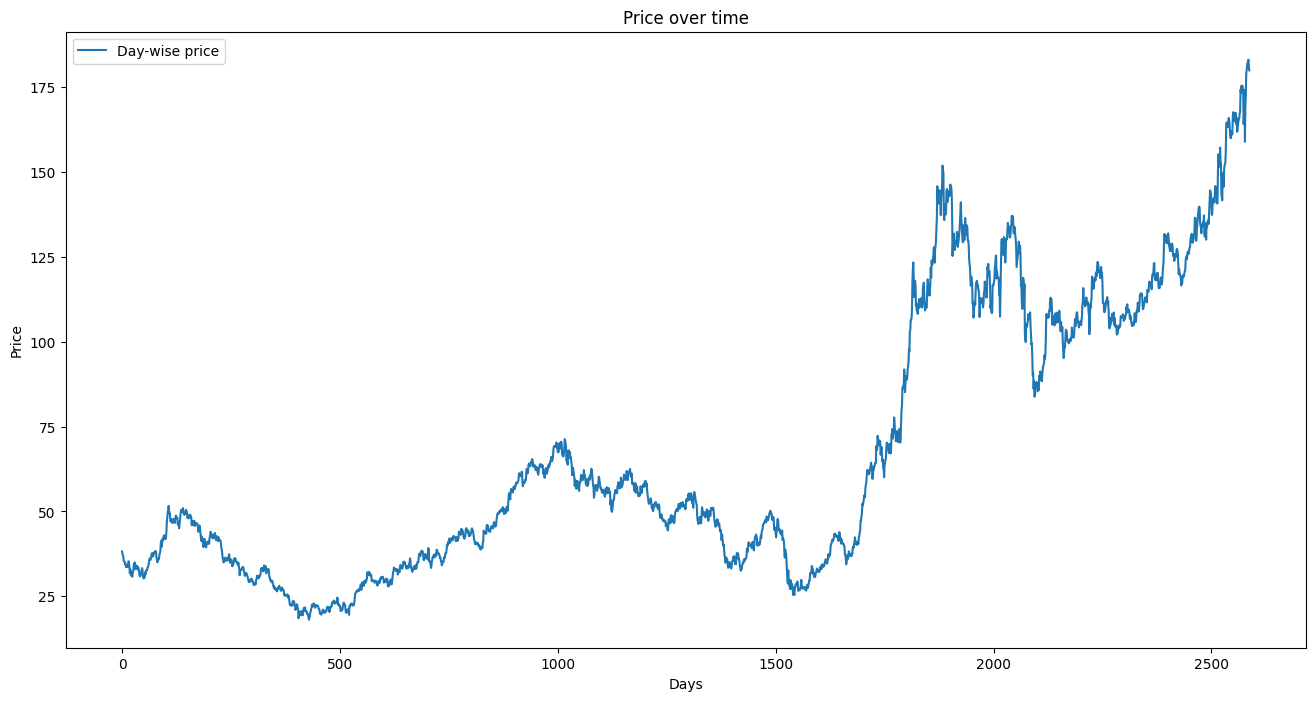

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(x["Price"], label="Day-wise price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Price over time")
plt.legend()
plt.show()

In [ ]:
x['Forecasted_Value'] = x['Price'].shift(7).fillna(0)
manual_values = [118, 117, 118, 117, 118, 117, 118]
x.loc[:6, 'Forecasted_Value'] = manual_values
x['ClosePrice_change'] = x['Price'].diff().fillna(0)
x.loc[:0, 'ClosePrice_change'] = 0.5

In [ ]:
x.head(10)

,Date,Price,Open,High,Low,Vol.,Change %,Forecasted_Value,ClosePrice_change
0,2021-06-28,118.40,117.40,118.90,116.30,116600000.0,1.61%,118.00,0.50
1,2021-06-29,117.25,118.45,119.20,116.56,78040000.0,-0.97%,117.00,-1.15
2,2021-06-30,116.66,118.11,119.10,116.28,80430000.0,-0.51%,118.00,-0.59
3,2021-07-01,116.36,117.19,117.68,115.64,56150000.0,-0.26%,117.00,-0.30
4,2021-07-02,113.60,116.60,116.68,113.02,75730000.0,-2.37%,118.00,-2.76
5,2021-07-05,115.68,114.60,116.18,113.60,76800000.0,1.84%,117.00,2.08
6,2021-07-06,116.72,115.86,117.80,115.03,91470000.0,0.90%,118.00,1.04
7,2021-07-07,121.86,116.79,122.50,115.85,167460000.0,4.40%,118.40,5.14
8,2021-07-08,118.97,122.50,123.00,118.12,124110000.0,-2.37%,117.25,-2.89
9,2021-07-09,123.93,119.20,124.41,118.80,178590000.0,4.17%,116.66,4.96


In [ ]:
non_zero_actuals = x['Price'] != 0

mape = (np.abs((x.loc[non_zero_actuals, 'Price'] - x.loc[non_zero_actuals, 'Forecasted_Value']) / x.loc[non_zero_actuals, 'Price']).mean()) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Percentage Error (MAPE): 4.02%


In [ ]:
val_acc = 1-mape/100
print(f'Validation Accuracy: {val_acc:.2f}')

Validation Accuracy: 0.96


In [ ]:
x['Price_1_day_ago'] = x['Price'].shift(1).fillna(0)
x['Forecasted_vs_actual_1_day_ago'] = x['Forecasted_Value'] - x['Price_1_day_ago']
x = x.drop('Price_1_day_ago', axis=1)
x.loc[:0, "Forecasted_vs_actual_1_day_ago"] = 56.95 - 56.19

In [ ]:
x['Actual_Direction'] = np.sign(x['Price'].diff())
x.loc[:0, "Actual_Direction"] = -1.0

x['Forecasted_Direction'] = np.sign(x['Forecasted_vs_actual_1_day_ago'])

x['Directional_Accuracy'] = (x['Actual_Direction'] == x['Forecasted_Direction']).astype(int)

MDA = x['Directional_Accuracy'].mean()

print(f'Mean Directional Accuracy (MDA): {MDA * 100:.2f}%')

Mean Directional Accuracy (MDA): 50.94%


In [ ]:
x.rename(columns={'Forecasted_Value': 'Forecasted_Price', 'ClosePrice_change':'Daily_Change(₹)',  'Forecasted_vs_actual_1_day_ago': 'F(t) - X(t-1)'}, inplace=True)

In [ ]:
x['Daily_Change(₹)'] = x['Daily_Change(₹)'].round(2)
x['Forecasted_Price'] = x['Forecasted_Price'].round(2)

In [ ]:
x.tail()

,Date,Price,Open,High,Low,Vol.,Change %,Forecasted_Price,Daily_Change(₹),F(t) - X(t-1),Actual_Direction,Forecasted_Direction,Directional_Accuracy
737,2024-06-18,181.12,183.80,184.60,180.60,35030000.0,-1.11%,172.05,-2.03,-11.10,-1.0,-1.0,1
738,2024-06-19,180.02,182.45,182.49,179.31,27480000.0,-0.61%,178.90,-1.10,-2.22,-1.0,-1.0,1
739,2024-06-20,182.28,181.60,182.95,179.37,38840000.0,1.26%,180.29,2.26,0.27,1.0,1.0,1
740,2024-06-21,179.94,179.40,180.90,178.18,65500000.0,-1.28%,181.33,-2.34,-0.95,-1.0,-1.0,1
741,2024-06-24,177.96,176.16,178.90,175.13,47590000.0,-1.10%,182.23,-1.98,2.29,-1.0,1.0,0
